# Rashika Suresh

# MKR Intern Selection Task

In [171]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Reading the data

In [172]:
data = pd.read_csv(r"MENTAL HEALTH DATASET.csv")

## Exploring the data

In [173]:
data.head(10)

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
5,2014-08-27 11:31:22,33,Male,United States,TN,NaN,Yes,No,Sometimes,6-25,...,Don't know,No,No,Yes,Yes,No,Maybe,Don't know,No,NaN
6,2014-08-27 11:31:50,35,Female,United States,MI,NaN,Yes,Yes,Sometimes,1-5,...,Somewhat difficult,Maybe,Maybe,Some of them,No,No,No,Don't know,No,NaN
7,2014-08-27 11:32:05,39,M,Canada,NaN,NaN,No,No,Never,1-5,...,Don't know,No,No,No,No,No,No,No,No,NaN
8,2014-08-27 11:32:39,42,Female,United States,IL,NaN,Yes,Yes,Sometimes,100-500,...,Very difficult,Maybe,No,Yes,Yes,No,Maybe,No,No,NaN
9,2014-08-27 11:32:43,23,Male,Canada,NaN,NaN,No,No,Never,26-100,...,Don't know,No,No,Yes,Yes,Maybe,Maybe,Yes,No,NaN


In [174]:
print("Data loaded successfully")

Data loaded successfully


In [175]:
data.describe()

,Age
count,1.259000e+03
mean,7.942815e+07
std,2.818299e+09
min,-1.726000e+03
25%,2.700000e+01
50%,3.100000e+01
75%,3.600000e+01
max,1.000000e+11


In [176]:
data.shape

(1259, 27)

In [177]:
data.columns

Index(['Timestamp', 'Age', 'Gender', 'Country', 'state', 'self_employed',
       'family_history', 'treatment', 'work_interfere', 'no_employees',
       'remote_work', 'tech_company', 'benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'comments'],
      dtype='object')

In [178]:
data.corr()

,Age
Age,1.0


## Making a list of columns to drop later

In [179]:
to_drop = []

## Converting timestamp to proper datatype

In [180]:
import datetime
data['Date'] = data['Timestamp'].apply(lambda x: datetime.date(int(x[:4]), int(x[5:7]), int(x[8:10])))

In [182]:
#appending timestamp to drop
to_drop.append('Timestamp')

In [183]:
data.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments,Date
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN,2014-08-27
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Maybe,No,No,No,No,No,Don't know,No,NaN,2014-08-27
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,No,No,Yes,Yes,Yes,Yes,No,No,NaN,2014-08-27
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN,2014-08-27
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN,2014-08-27


## Cleaning the data

In [184]:
pd.DataFrame(data.isnull().sum(),columns=['Count of missing values'])

,Count of missing values
Timestamp,0
Age,0
Gender,0
Country,0
state,515
self_employed,18
family_history,0
treatment,0
work_interfere,264
no_employees,0


### comments, work interfere and state has huge missing values which can't be used for efficient data analysis. So we will try to do something with this.

In [185]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 28 columns):
Timestamp                    1259 non-null object
Age                          1259 non-null int64
Gender                       1259 non-null object
Country                      1259 non-null object
state                        744 non-null object
self_employed                1241 non-null object
family_history               1259 non-null object
treatment                    1259 non-null object
work_interfere               995 non-null object
no_employees                 1259 non-null object
remote_work                  1259 non-null object
tech_company                 1259 non-null object
benefits                     1259 non-null object
care_options                 1259 non-null object
wellness_program             1259 non-null object
seek_help                    1259 non-null object
anonymity                    1259 non-null object
leave                        1259 non-null obj

## Cleaning the age of survey partcipants

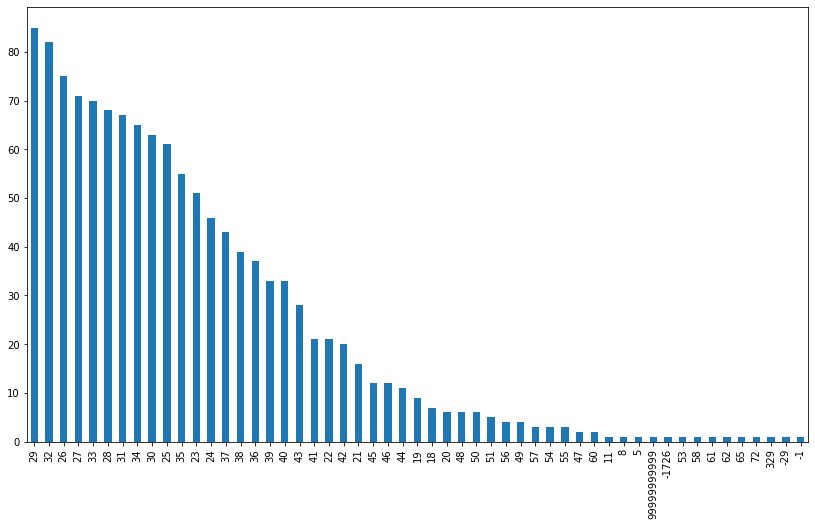

In [186]:
data['Age'].value_counts().plot(kind='bar', figsize=(14,8))

### Even children have participated in this survey, so we have to get rid of them

In [187]:
data.query('Age <= 10 | Age >= 75')

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments,Date
143,2014-08-27 12:39:14,-29,Male,United States,MN,No,No,No,NaN,More than 1000,...,No,No,Some of them,Yes,No,No,Don't know,No,NaN,2014-08-27
364,2014-08-27 15:05:21,329,Male,United States,OH,No,No,Yes,Often,6-25,...,Maybe,No,Some of them,No,No,No,No,No,NaN,2014-08-27
390,2014-08-27 15:24:47,99999999999,All,Zimbabwe,NaN,Yes,Yes,Yes,Often,1-5,...,Yes,Yes,No,No,Yes,No,No,Yes,NaN,2014-08-27
715,2014-08-28 10:07:53,-1726,male,United Kingdom,NaN,No,No,Yes,Sometimes,26-100,...,Yes,No,No,No,No,Maybe,Don't know,No,NaN,2014-08-28
734,2014-08-28 10:35:55,5,Male,United States,OH,No,No,No,NaN,100-500,...,No,No,Yes,Yes,No,No,Yes,No,We had a developer suffer from depression and ...,2014-08-28
989,2014-08-29 09:10:58,8,A little about you,"Bahamas, The",IL,Yes,Yes,Yes,Often,1-5,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,,2014-08-29
1127,2014-08-30 20:55:11,-1,p,United States,AL,Yes,Yes,Yes,Often,1-5,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,password: testered,2014-08-30


In [188]:
data = data[data.Age > 18]

In [189]:
data = data[data.Age < 75]

In [190]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1244 entries, 0 to 1258
Data columns (total 28 columns):
Timestamp                    1244 non-null object
Age                          1244 non-null int64
Gender                       1244 non-null object
Country                      1244 non-null object
state                        735 non-null object
self_employed                1226 non-null object
family_history               1244 non-null object
treatment                    1244 non-null object
work_interfere               984 non-null object
no_employees                 1244 non-null object
remote_work                  1244 non-null object
tech_company                 1244 non-null object
benefits                     1244 non-null object
care_options                 1244 non-null object
wellness_program             1244 non-null object
seek_help                    1244 non-null object
anonymity                    1244 non-null object
leave                        1244 non-null obj

In [191]:
data['Age'].mean()

32.155948553054664

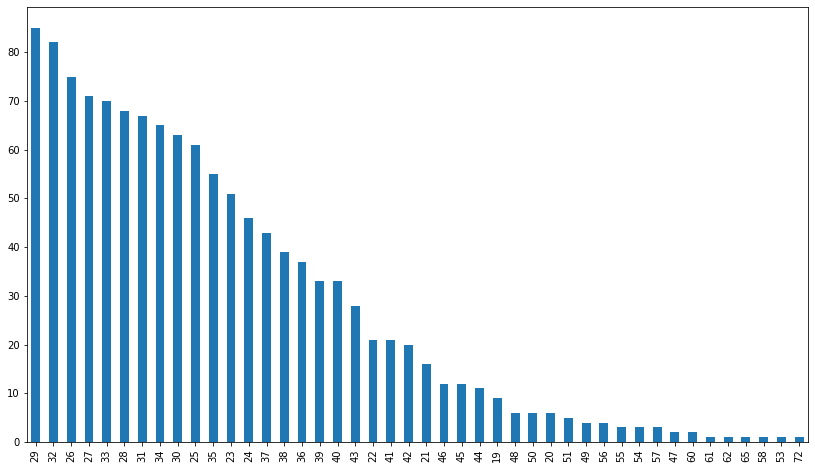

In [192]:
data['Age'].value_counts().plot(kind='bar',figsize=(14,8))

## Cleaning the gender of the participants

In [193]:
data.Gender.value_counts()

Male                                              609
male                                              202
Female                                            120
M                                                 116
female                                             62
F                                                  38
m                                                  34
f                                                  15
Make                                                4
Woman                                               3
Male                                                3
Cis Male                                            2
Female                                              2
Man                                                 2
Female (trans)                                      2
cis male                                            1
Malr                                                1
Cis Man                                             1
fluid                       

### Must clean this to minimise count since it isn't uniform

In [194]:
data['Gender'] = data['Gender'].str.lower()
male = ["male", "m", "male-ish", "maile", "mal", "male (cis)", "make", "male ", "man","msle", "mail", "malr","cis man", "cis male"]
trans = ["trans-female", "something kinda male?", "queer/she/they", "non-binary","nah", "all", "enby", "fluid", "genderqueer", "androgyne", "agender", "male leaning androgynous", "guy (-ish) ^_^", "trans woman", "neuter", "female (trans)", "queer", "ostensibly male, unsure what that really means"]
female = ["cis female", "f", "female", "woman",  "femake", "female ","cis-female/femme", "female (cis)", "femail"]
data['Gender'] = data['Gender'].apply(lambda x:"Male" if x in male else x)
data['Gender'] = data['Gender'].apply(lambda x:"Female" if x in female else x)
data['Gender'] = data['Gender'].apply(lambda x:"Trans" if x in trans else x)

In [195]:
data.Gender.unique()

array(['Female', 'Male', 'Trans'], dtype=object)

In [196]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1244 entries, 0 to 1258
Data columns (total 28 columns):
Timestamp                    1244 non-null object
Age                          1244 non-null int64
Gender                       1244 non-null object
Country                      1244 non-null object
state                        735 non-null object
self_employed                1226 non-null object
family_history               1244 non-null object
treatment                    1244 non-null object
work_interfere               984 non-null object
no_employees                 1244 non-null object
remote_work                  1244 non-null object
tech_company                 1244 non-null object
benefits                     1244 non-null object
care_options                 1244 non-null object
wellness_program             1244 non-null object
seek_help                    1244 non-null object
anonymity                    1244 non-null object
leave                        1244 non-null obj

In [234]:
data.Gender.value_counts()

Male      981
Female    246
Trans      17
Name: Gender, dtype: int64

In [235]:
data.describe(include=['O'])

,Timestamp,Gender,Country,state,self_employed,family_history,treatment,work_interfere,remote_work,tech_company,obs_consequence,comments,Date
count,1244,1244,1244,735,1244,1244,1244,984,1244,1244,1244,159,1244
unique,1232,3,46,45,2,2,2,4,2,2,2,155,52
top,2014-08-27 12:31:41,Male,United States,CA,No,No,Yes,Sometimes,No,Yes,No,* Small family business - YMMV.,2014-08-27
freq,2,981,743,138,1102,756,629,462,877,1019,1063,5,604


## Cleaning the country of the participants

In [236]:
data.Country.value_counts()

United States             743
United Kingdom            183
Canada                     72
Germany                    45
Ireland                    27
Netherlands                26
Australia                  21
France                     13
India                      10
New Zealand                 8
Switzerland                 7
Poland                      7
Sweden                      7
Italy                       7
South Africa                6
Brazil                      6
Belgium                     6
Israel                      5
Singapore                   4
Bulgaria                    4
Austria                     3
Mexico                      3
Colombia                    2
Portugal                    2
Greece                      2
Finland                     2
Denmark                     2
Russia                      2
Croatia                     2
Thailand                    1
Japan                       1
Moldova                     1
Hungary                     1
Uruguay   

### Using country for further visualization, wouldn't be effective as most of the participants are from US, UK, Canada

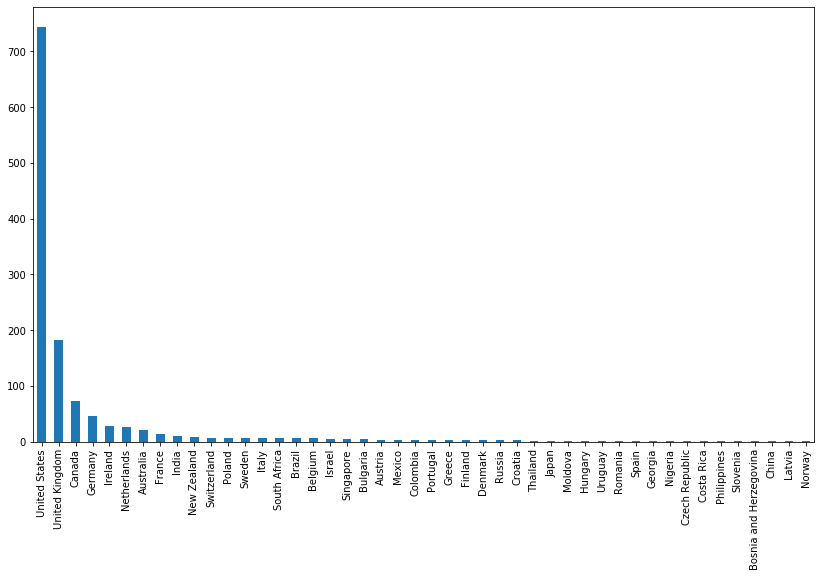

In [237]:
data['Country'].value_counts().plot(kind='bar',figsize=(14,8));

In [238]:
## Adding country to the list to drop
to_drop.append('Country')

In [239]:
data.columns

Index(['Timestamp', 'Age', 'Gender', 'Country', 'state', 'self_employed',
       'family_history', 'treatment', 'work_interfere', 'no_employees',
       'remote_work', 'tech_company', 'benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'comments', 'Date'],
      dtype='object')

## Cleaning the self employed column

In [240]:
data['self_employed'].unique()

array(['No', 'Yes'], dtype=object)

In [241]:
data['self_employed'].mode()

0    No
dtype: object

In [242]:
data['self_employed'] = data['self_employed'].fillna('No')

In [243]:
data['self_employed'].unique()

array(['No', 'Yes'], dtype=object)

In [244]:
# appending self employed to drop column
to_drop.append('self_employed')

## Cleaning state column

### Too many missing values in state, trying to handle it

In [245]:
data.groupby('Country')['state'].apply(lambda x: x.isnull().mean())

Country
Australia                 1.000000
Austria                   1.000000
Belgium                   1.000000
Bosnia and Herzegovina    1.000000
Brazil                    1.000000
Bulgaria                  0.750000
Canada                    1.000000
China                     1.000000
Colombia                  1.000000
Costa Rica                1.000000
Croatia                   1.000000
Czech Republic            1.000000
Denmark                   1.000000
Finland                   1.000000
France                    1.000000
Georgia                   1.000000
Germany                   1.000000
Greece                    1.000000
Hungary                   1.000000
India                     1.000000
Ireland                   1.000000
Israel                    0.800000
Italy                     1.000000
Japan                     1.000000
Latvia                    0.000000
Mexico                    1.000000
Moldova                   1.000000
Netherlands               1.000000
New Zealand 

### Most countries have no state data

In [246]:
## Moving state to drop list
to_drop.append('state')

In [247]:
data.columns

Index(['Timestamp', 'Age', 'Gender', 'Country', 'state', 'self_employed',
       'family_history', 'treatment', 'work_interfere', 'no_employees',
       'remote_work', 'tech_company', 'benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'comments', 'Date'],
      dtype='object')

## Cleaning the work_interfere column

In [248]:
data.work_interfere.unique()

array(['Often', 'Rarely', 'Never', 'Sometimes', nan], dtype=object)

In [249]:
data.no_employees = data.no_employees.map({'6-25': 6, '26-100': 26,
                                       '100-500': 100, '500-1000': 500,
                                       'More than 1000': 1000, '1-5': 1
                                      })
data.benefits.unique()


array([ 1,  0, -1], dtype=int64)

In [250]:
# There is another pattern here. We take advantage of that:
option_map = {'Yes': 1, 'No': -1, "Don't know": 0,
              'Not sure': 0, 'Maybe': 0, 'Some of them': 0}
ynns = {'Yes': 1, 'No': -1, 'Not sure': 0}
for col in data.select_dtypes(include=['object']):
    uniques = set(data[col].unique())
    if (uniques == {'Yes', 'No', "Don't know"} or
        uniques == {'Yes', 'No', 'Not sure'} or
        uniques == {'Yes', 'No', 'Maybe'} or
        uniques == {'Yes', 'No', 'Some of them'}):
        print('encoding', col, 'To -1, 0, 1')
        data[col] = data[col].map(option_map)

In [251]:
data.describe(include=['O'])

,Timestamp,Gender,Country,state,self_employed,family_history,treatment,work_interfere,remote_work,tech_company,obs_consequence,comments,Date
count,1244,1244,1244,735,1244,1244,1244,984,1244,1244,1244,159,1244
unique,1232,3,46,45,2,2,2,4,2,2,2,155,52
top,2014-08-27 12:31:41,Male,United States,CA,No,No,Yes,Sometimes,No,Yes,No,* Small family business - YMMV.,2014-08-27
freq,2,981,743,138,1102,756,629,462,877,1019,1063,5,604


## Cleaning the leave column

In [252]:
data.leave.unique()

array([1, 2, 3, 4, 0], dtype=int64)

In [253]:
data.leave = data.leave.map({'Very easy': 0, 'Somewhat easy': 1, "Don't know": 2, 'Somewhat difficult': 3,
                         'Very difficult': 4
                        })

## Cleaning the comments column

In [254]:
comments.dropna(inplace=True)
comments.head()

13    I'm not on my company's health insurance which...
15    I have chronic low-level neurological issues t...
16    My company does provide healthcare but not to ...
24                  Relatively new job. Ask again later
25    Sometimes I think  about using drugs for my me...
Name: comments, dtype: object

In [255]:
to_drop.append('comments')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1244 entries, 0 to 1258
Data columns (total 28 columns):
Timestamp                    1244 non-null object
Age                          1244 non-null int64
Gender                       1244 non-null object
Country                      1244 non-null object
state                        735 non-null object
self_employed                1244 non-null object
family_history               1244 non-null object
treatment                    1244 non-null object
work_interfere               984 non-null object
no_employees                 0 non-null float64
remote_work                  1244 non-null object
tech_company                 1244 non-null object
benefits                     1244 non-null int64
care_options                 1244 non-null int64
wellness_program             1244 non-null int64
seek_help                    1244 non-null int64
anonymity                    1244 non-null int64
leave                        0 non-null float64
menta

## Dropping the columns

In [282]:
#Appending the date column
to_drop.append('Date')
to_drop.append('leave')
print(to_drop)

['Timestamp', 'Gender', 'Country', 'self_employed', 'state', 'comments', 'Country', 'self_employed', 'state', 'comments', 'Date', 'Date', 'Date', 'Date', 'leave']


In [283]:
cleaned_data = data.drop(to_drop, axis=1)
cleaned_data.head()

,Age,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,No,Yes,Often,NaN,No,Yes,1,0,-1,1,1,-1,-1,0,1,-1,0,1,No
1,44,No,No,Rarely,NaN,No,No,0,-1,0,0,0,0,-1,-1,-1,-1,-1,0,No
2,32,No,No,Rarely,NaN,No,Yes,-1,-1,-1,-1,0,-1,-1,1,1,1,1,-1,No
3,31,Yes,Yes,Often,NaN,No,Yes,-1,1,-1,-1,-1,1,1,0,-1,0,0,-1,Yes
4,31,No,No,Never,NaN,Yes,Yes,1,-1,0,0,0,-1,-1,0,1,1,1,0,No


In [268]:
data.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments,Date
0,2014-08-27 11:29:31,37,Female,United States,IL,No,No,Yes,Often,NaN,...,-1,-1,0,1,-1,0,1,No,NaN,2014-08-27
1,2014-08-27 11:29:37,44,Male,United States,IN,No,No,No,Rarely,NaN,...,0,-1,-1,-1,-1,-1,0,No,NaN,2014-08-27
2,2014-08-27 11:29:44,32,Male,Canada,NaN,No,No,No,Rarely,NaN,...,-1,-1,1,1,1,1,-1,No,NaN,2014-08-27
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,No,Yes,Yes,Often,NaN,...,1,1,0,-1,0,0,-1,Yes,NaN,2014-08-27
4,2014-08-27 11:30:22,31,Male,United States,TX,No,No,No,Never,NaN,...,-1,-1,0,1,1,1,0,No,NaN,2014-08-27


## Few Visualizations

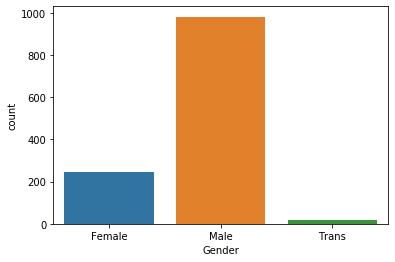

In [269]:
sns.countplot(data['Gender'])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45]),
 <a list of 46 Text xticklabel objects>)

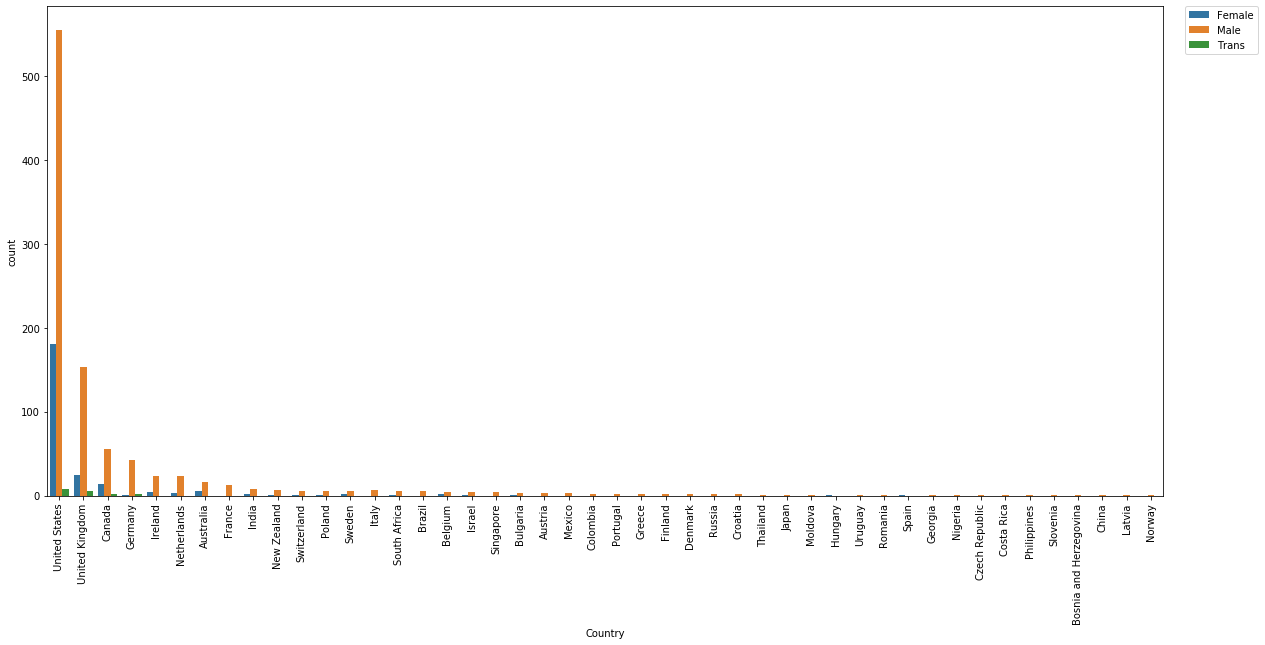

In [270]:
plt.figure(figsize= (20,9))
sns.countplot(x='Country', order= data['Country'].value_counts().index, hue='Gender', data=data)
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
plt.xticks(rotation=90)


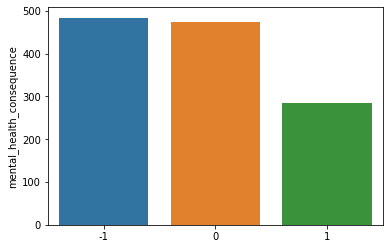

In [271]:
sns.barplot(data['mental_health_consequence'].unique(),data['mental_health_consequence'].value_counts())

Text(10, 20.5, 'Mental Health Survey Participants from India')

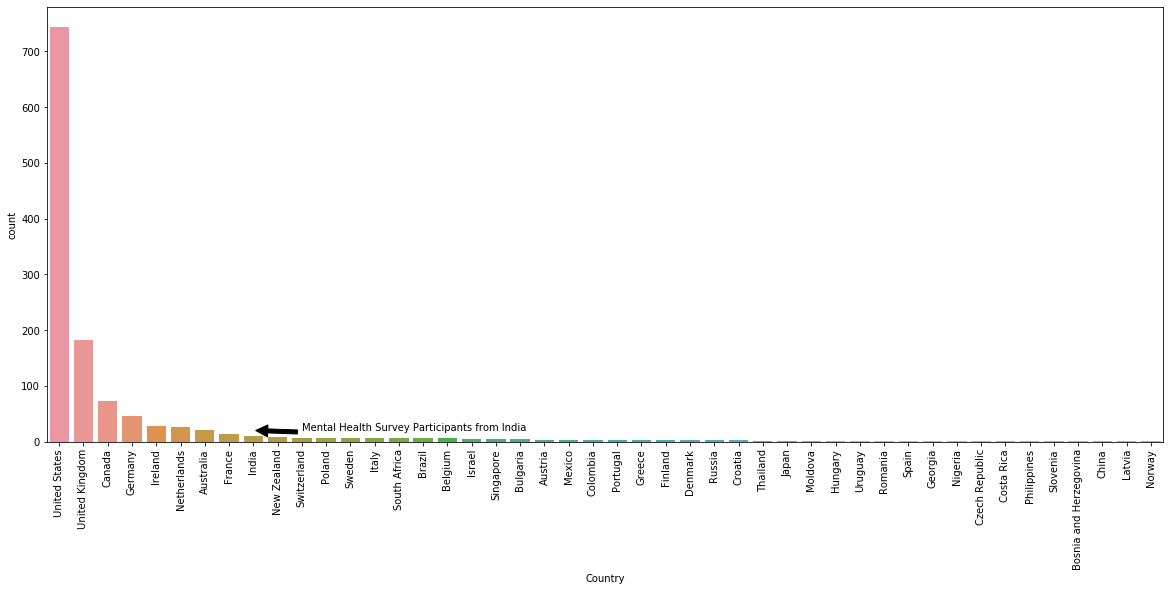

In [276]:
#country wise representation giving importance to India
plt.figure(figsize=(20,8))
sns.countplot(data.Country, order= data['Country'].value_counts().index)
plt.xticks(rotation=90)
plt.annotate('Mental Health Survey Participants from India', xy=(8, 20), xytext=(10, 20.5),
             arrowprops=dict(facecolor='black', shrink=0.05),)

 0    768
-1    255
 1    221
Name: coworkers, dtype: int64

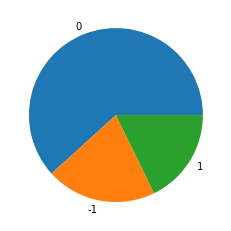

In [277]:
plt.pie(data['coworkers'].value_counts(),labels=data['coworkers'].unique())
data['coworkers'].value_counts()


(array([337.,   0.,   0.,   0.,   0., 569.,   0.,   0.,   0., 338.]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <a list of 1 Patch objects>)

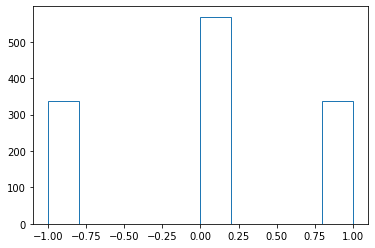

In [278]:
#Mental health vs Physical Health
plt.hist(data['mental_vs_physical'],histtype='step')

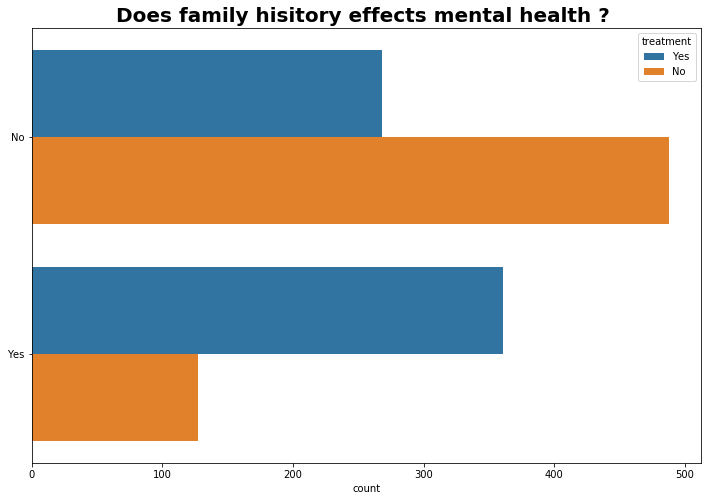

In [279]:
#family history vs mental health
plt.figure(figsize=(12,8))
sns.countplot(y="family_history", hue="treatment", data=data)
plt.title("Does family hisitory effects mental health ? ",fontsize=20,fontweight="bold")
plt.ylabel("")
plt.show()

## Importing the cleaned data to excel for further visualizations

In [285]:
cleaned_data.to_excel("health.xlsx", sheet_name = "cleaned_dataset")